# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Mochamad Taufiqul Hafizh M180B4KY2528
- **Email:** m180b4ky2528@bangkit.academy
- **ID Dicoding:** mthafixh_bangkit

## Menentukan Pertanyaan Bisnis

Pada Project ini, saya menggunakan Dataset Air Quality. Setelah memahami dataset tersebut, saya merumuskan pertanyaan analisis sebagai berikut:

1.   Pada tahun berapa stasiun Aotizhongxin mencatat rata-rata temperatur tertinggi
2.  Bagaimana trend bulanan kadar SO2, NO2, CO, dan O3 di kota Aotizhongxin?
3.  Bagaimana korelasi antara kadar O3 dan Temperatur?


## Import Semua Packages/Library yang Digunakan

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [47]:
dataset = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [5]:
dataset.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- xxx
- xxx

### Assessing Data

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
dataset.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [8]:
print("Jumlah duplikasi: ", dataset.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
dataset.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Missing Values pada PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM
- Tidak ada duplicate row
- Possible outlier: PM2.5 PM10 SO2 NO2 CO O3 WSPM

### Cleaning Data

In [62]:
# Mengganti missing values numerik dengan mean
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']:
  datasetMean = dataset[column].mean()
  values = {column: datasetMean}
  dataset = dataset.fillna(values)

# Mengganti missing values categorical dengan modus
dataset = dataset.fillna({'wd': dataset['wd'].mode()[0]})

# Mendeteksi dan mengganti outlier
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']:
  upper_limit = dataset[column].mean() + 3* dataset[column].std()
  lower_limit = dataset[column].mean() - 3* dataset[column].std()
  dataset.loc[dataset[column] >= upper_limit, column] = upper_limit
  dataset.loc[dataset[column] <= lower_limit, column] = lower_limit

299.9863327380247 -138.54377113152316
70.85052601068395 -38.270065329654535
166.07249167464013 -47.96596346697859
4138.922094760253 -1721.0253752334202
217.69646956979955 -106.41146676948222
5.147165953312387 -1.7595376748328264


In [59]:
dataset.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [63]:
dataset.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.719502,110.060391,16.284391,59.053260,1208.739785,55.642225,13.584607,1011.846920,3.123062,0.067421,1.693812
std,10122.249256,1.177213,3.448752,8.800218,6.922285,73.083014,94.243001,18.169215,35.673064,976.031317,54.017159,11.395845,10.401079,13.684991,0.909796,1.151111
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,299.986333,984.000000,70.850526,166.072492,4138.922095,217.696470,40.500000,1042.000000,28.500000,72.500000,5.147166


## Exploratory Data Analysis (EDA)

### Explore 1: Pada tahun berapa stasiun Aotizhongxin mencatat rata-rata temperatur tertinggi

In [100]:
avg_temp_by_year = dataset.groupby(by='year')['TEMP'].mean()
avg_temp_by_year

,TEMP
year,
2013,15.497740
2014,13.878128
2015,13.478428
2016,13.863318
2017,0.774339


**Insight:**
- Tahun dengan rata-rata temperatur tertinggi dari 2013-2017 adalah tahun 2013

### Explore 2: Bagaimana trend bulanan kadar SO2, NO2, CO, dan O3 di kota Aotizhongxin?

In [112]:
avg_co_by_month = dataset.groupby(by=['year', 'month'])[['SO2', 'NO2', 'CO', 'O3']].mean()
avg_co_by_month

SO2        NO2           CO          O3
year month                                               
2013 3      37.355079  74.001239  1459.724447   47.632259
     4      23.716741  53.327958   929.424179   50.530616
     5      29.063277  61.006818   970.938552   73.808397
     6      14.631730  72.221078  1321.235085   68.795895
     7       9.295049  55.142494   839.529309   71.412159
     8       6.999763  56.858156   908.528673   69.250953
     9      13.816619  64.138904  1061.146460   37.418571
     10     22.058761  73.542566  1123.413358   22.885024
     11     24.823512  59.950101  1436.538741   37.337362
     12     35.083897  62.222209  1614.577636   18.856788
2014 1      47.222890  67.022141  1807.393951   16.405368
     2      43.624195  65.229182  1934.253409   22.555696
     3      32.985853  68.680205  1362.359151   37.612276
     4      19.791747  68.203446   938.372902   57.114743
     5      15.405493  55.933229   804.724094   77.787980
     6       6.307467  51.289199   697.587424   87.678910
     7       4.526548  48.755677   802.722971   88.995431
     8       4.174708  55.170485   727.020916   81.762350
     9       5.811131  64.327869   922.648781   43.422612
     10     11.113839  84.973597  1314.151015   23.036955
     11     17.132857  77.982709  1559.626139   16.628843
     12     20.836967  54.800909  1234.456627   39.972288
2015 1      35.317169  68.810833  1928.074871   19.337921
     2      28.663489  56.532924  1458.861374   46.304197
     3      22.391533  61.217764  1250.731421   54.162241
     4       9.766710  54.895852   838.939686   77.242807
     5       8.728666  47.718975   764.366714   97.826813
     6       7.467554  45.716519   935.859857   99.038759
     7       5.896687  52.412699   847.585432  112.295348
     8       4.301257  43.405581   874.501951   93.701525
     9       5.986476  59.278658   986.782082   64.770761
     10      6.366935  69.737796  1175.956152   41.996324
     11     10.672410  77.374158  2141.978940   18.090047
     12     23.486477  88.326730  2433.006527   23.674033
2016 1      22.260886  56.088791  1676.000657   33.553540
     2      16.189462  33.396991   981.764159   51.972204
     3      21.889218  48.882099  1323.600006   51.897707
     4      11.466677  35.719640   767.139744   74.747350
     5       9.555794  31.014341   668.891588   97.225989
     6       5.582644  28.403088   737.710806  112.773194
     7       4.037502  36.574049   875.437378   98.667359
     8       2.840063  39.936874   760.354249   88.441878
     9       3.750740  49.637480   717.833521   62.075767
     10      3.355849  63.551830  1127.185336   25.628173
     11      9.828655  73.844369  1908.124241   17.107195
     12     18.037605  85.056862  2188.391945   18.236721
2017 1      19.335203  70.315343  1709.633057   40.731344
     2      20.704436  60.487913  1203.249865   55.148820

**Insight:**
- Dihasilkan rata-rata kadar CO per bulan pada tahun 2013-2017

### Explore 3: Bagaimana korelasi antara kadar O3 dan Temperatur?

In [95]:
correlation = dataset.drop(['wd', 'station'], axis = 1).corr()
correlation

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.037655,-0.080088,-0.255309,-0.091168,0.039426,0.049990,-0.107725,0.236798,-0.133159,0.002219,0.098517
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.043523,-0.072615,-0.188532,-0.117927,0.028486,0.073021,-0.137126,0.232452,-0.197175,-0.001031,0.137781
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.026104,-0.026803,-0.252748,0.115036,0.042221,-0.097538,0.130309,-0.005655,0.273095,0.013491,-0.167433
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.008236,0.031814,-0.020818,0.016818,-0.019535,0.003251,0.014320,0.022532,0.023420,-0.002490,-0.014398
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.011104,0.022217,0.009322,-0.048005,-0.043643,0.295506,0.141116,-0.037600,-0.013425,0.011528,0.159222
PM2.5,-0.037655,-4.352347e-02,2.610437e-02,8.235518e-03,-1.110373e-02,1.000000,0.859093,0.494327,0.681572,0.778312,-0.166926,-0.113368,-0.017382,0.140200,-0.014325,-0.293977
PM10,-0.080088,-7.261460e-02,-2.680313e-02,3.181403e-02,2.221707e-02,0.859093,1.000000,0.466080,0.641312,0.660023,-0.146086,-0.109730,-0.035139,0.060867,-0.027771,-0.187707
SO2,-0.255309,-1.885316e-01,-2.527481e-01,-2.081841e-02,9.322207e-03,0.494327,0.466080,1.000000,0.454066,0.590465,-0.209712,-0.372761,0.221956,-0.303908,-0.047241,-0.119801
NO2,-0.091168,-1.179271e-01,1.150358e-01,1.681755e-02,-4.800550e-02,0.681572,0.641312,0.454066,1.000000,0.708571,-0.512018,-0.239949,0.081327,0.066934,-0.040503,-0.498900
CO,0.039426,2.848645e-02,4.222133e-02,-1.953550e-02,-4.364323e-02,0.778312,0.660023,0.590465,0.708571,1.000000,-0.355695,-0.367048,0.212584,-0.088843,-0.016662,-0.315259


**Insight:**
- Nilai korelasi antara Temperature dan O3 adalah 0.579470 (Berkorelasi positif)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada tahun berapa stasiun Aotizhongxin mencatat rata-rata temperatur tertinggi

In [105]:
print(avg_temp_by_year)

year
2013    15.497740
2014    13.878128
2015    13.478428
2016    13.863318
2017     0.774339
Name: TEMP, dtype: float64


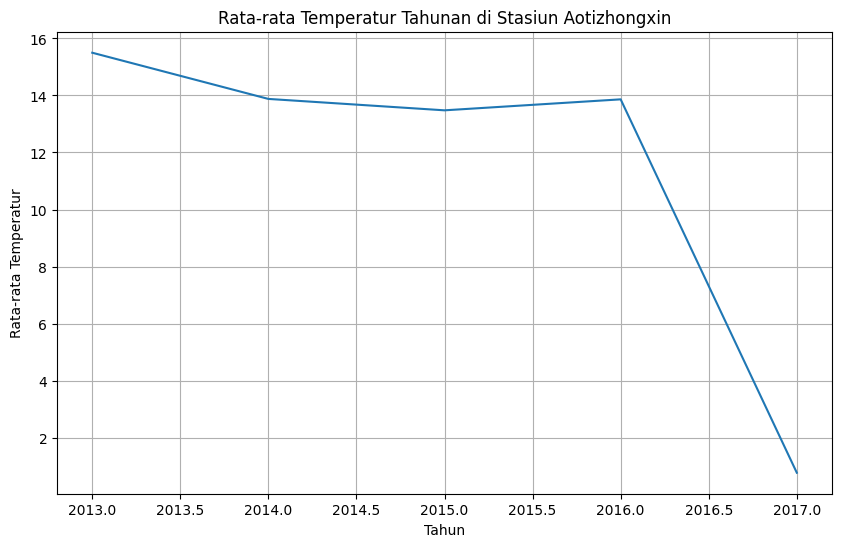

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_year.index, avg_temp_by_year.values)
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Temperatur')
plt.title('Rata-rata Temperatur Tahunan di Stasiun Aotizhongxin')
plt.grid(True)
plt.show()

Rata-rata pada tahun 2017 jauh lebih rendah dikarenakan data pada tahun tersebut hanya tersedia dua bulan pertama

Drop tahun 2017

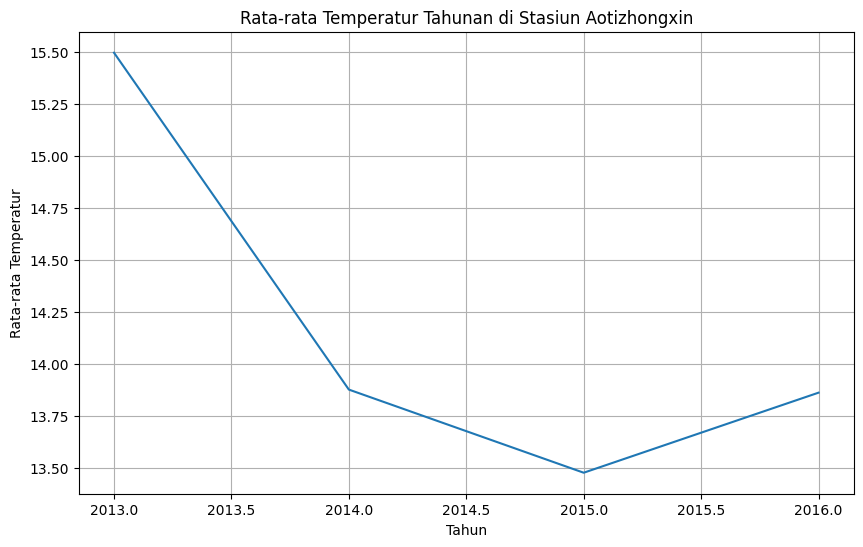

In [106]:
avg_temp_by_year = avg_temp_by_year.drop(2017)
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_year.index, avg_temp_by_year.values)
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Temperatur')
plt.title('Rata-rata Temperatur Tahunan di Stasiun Aotizhongxin')
plt.grid(True)
plt.show()

**Insight:**
- Dapat diketahui bahwa rata-rata temperatur tertinggi berada di tahun 2013
- Dapat diketahui bahwa rata-rata temperatur terendah berada di tahun 2015

### Pertanyaan 2:

In [113]:
avg_co_by_month

SO2        NO2           CO          O3
year month                                               
2013 3      37.355079  74.001239  1459.724447   47.632259
     4      23.716741  53.327958   929.424179   50.530616
     5      29.063277  61.006818   970.938552   73.808397
     6      14.631730  72.221078  1321.235085   68.795895
     7       9.295049  55.142494   839.529309   71.412159
     8       6.999763  56.858156   908.528673   69.250953
     9      13.816619  64.138904  1061.146460   37.418571
     10     22.058761  73.542566  1123.413358   22.885024
     11     24.823512  59.950101  1436.538741   37.337362
     12     35.083897  62.222209  1614.577636   18.856788
2014 1      47.222890  67.022141  1807.393951   16.405368
     2      43.624195  65.229182  1934.253409   22.555696
     3      32.985853  68.680205  1362.359151   37.612276
     4      19.791747  68.203446   938.372902   57.114743
     5      15.405493  55.933229   804.724094   77.787980
     6       6.307467  51.289199   697.587424   87.678910
     7       4.526548  48.755677   802.722971   88.995431
     8       4.174708  55.170485   727.020916   81.762350
     9       5.811131  64.327869   922.648781   43.422612
     10     11.113839  84.973597  1314.151015   23.036955
     11     17.132857  77.982709  1559.626139   16.628843
     12     20.836967  54.800909  1234.456627   39.972288
2015 1      35.317169  68.810833  1928.074871   19.337921
     2      28.663489  56.532924  1458.861374   46.304197
     3      22.391533  61.217764  1250.731421   54.162241
     4       9.766710  54.895852   838.939686   77.242807
     5       8.728666  47.718975   764.366714   97.826813
     6       7.467554  45.716519   935.859857   99.038759
     7       5.896687  52.412699   847.585432  112.295348
     8       4.301257  43.405581   874.501951   93.701525
     9       5.986476  59.278658   986.782082   64.770761
     10      6.366935  69.737796  1175.956152   41.996324
     11     10.672410  77.374158  2141.978940   18.090047
     12     23.486477  88.326730  2433.006527   23.674033
2016 1      22.260886  56.088791  1676.000657   33.553540
     2      16.189462  33.396991   981.764159   51.972204
     3      21.889218  48.882099  1323.600006   51.897707
     4      11.466677  35.719640   767.139744   74.747350
     5       9.555794  31.014341   668.891588   97.225989
     6       5.582644  28.403088   737.710806  112.773194
     7       4.037502  36.574049   875.437378   98.667359
     8       2.840063  39.936874   760.354249   88.441878
     9       3.750740  49.637480   717.833521   62.075767
     10      3.355849  63.551830  1127.185336   25.628173
     11      9.828655  73.844369  1908.124241   17.107195
     12     18.037605  85.056862  2188.391945   18.236721
2017 1      19.335203  70.315343  1709.633057   40.731344
     2      20.704436  60.487913  1203.249865   55.148820

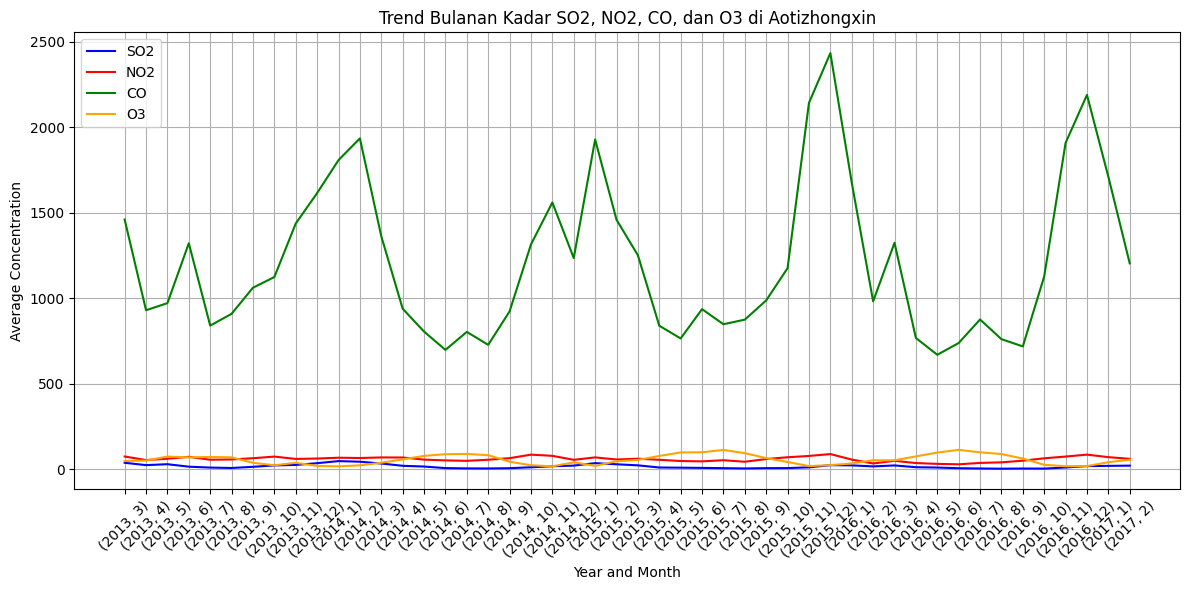

In [119]:
plt.figure(figsize=(12, 6))

x_axis = [str(i) for i in avg_co_by_month.index]

# Plot SO2
plt.plot(x_axis, avg_co_by_month['SO2'], label='SO2', color='blue')

# Plot NO2
plt.plot(x_axis, avg_co_by_month['NO2'], label='NO2', color='red')

# Plot CO
plt.plot(x_axis, avg_co_by_month['CO'], label='CO', color='green')

# Plot O3
plt.plot(x_axis, avg_co_by_month['O3'], label='O3', color='orange')

plt.xlabel('Year and Month')
plt.ylabel('Average Concentration')
plt.title('Trend Bulanan Kadar SO2, NO2, CO, dan O3 di Aotizhongxin')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Nilai pada kolom CO terlalu ekstrem.

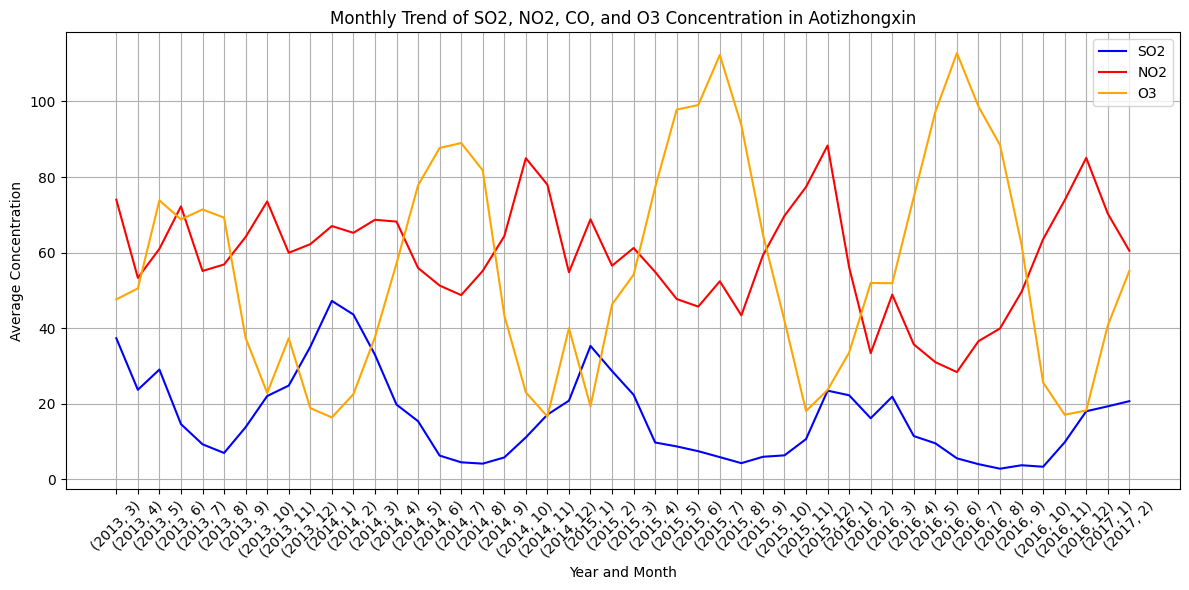

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

x_axis = [str(i) for i in avg_co_by_month.index]

# Plot SO2
plt.plot(x_axis, avg_co_by_month['SO2'], label='SO2', color='blue')

# Plot NO2
plt.plot(x_axis, avg_co_by_month['NO2'], label='NO2', color='red')

# Plot O3
plt.plot(x_axis, avg_co_by_month['O3'], label='O3', color='orange')

plt.xlabel('Year and Month')
plt.ylabel('Average Concentration')
plt.title('Monthly Trend of SO2, NO2, CO, and O3 Concentration in Aotizhongxin')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Insight:**
- Kadar polusi memiliki pola naik dan turun setiap tahunnya
- Kadar O3 naik hinggga memuncak pada pertengahan tahun dan menurun hingga akhir tahun
- Kader SO3 naik hinggga memuncak pada akhir tahun dan menurun hingga tengah tahun
- Kadar NO2 memiliki tren yang sama dengan SO3

In [122]:
correlation

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.037655,-0.080088,-0.255309,-0.091168,0.039426,0.049990,-0.107725,0.236798,-0.133159,0.002219,0.098517
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.043523,-0.072615,-0.188532,-0.117927,0.028486,0.073021,-0.137126,0.232452,-0.197175,-0.001031,0.137781
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.026104,-0.026803,-0.252748,0.115036,0.042221,-0.097538,0.130309,-0.005655,0.273095,0.013491,-0.167433
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.008236,0.031814,-0.020818,0.016818,-0.019535,0.003251,0.014320,0.022532,0.023420,-0.002490,-0.014398
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.011104,0.022217,0.009322,-0.048005,-0.043643,0.295506,0.141116,-0.037600,-0.013425,0.011528,0.159222
PM2.5,-0.037655,-4.352347e-02,2.610437e-02,8.235518e-03,-1.110373e-02,1.000000,0.859093,0.494327,0.681572,0.778312,-0.166926,-0.113368,-0.017382,0.140200,-0.014325,-0.293977
PM10,-0.080088,-7.261460e-02,-2.680313e-02,3.181403e-02,2.221707e-02,0.859093,1.000000,0.466080,0.641312,0.660023,-0.146086,-0.109730,-0.035139,0.060867,-0.027771,-0.187707
SO2,-0.255309,-1.885316e-01,-2.527481e-01,-2.081841e-02,9.322207e-03,0.494327,0.466080,1.000000,0.454066,0.590465,-0.209712,-0.372761,0.221956,-0.303908,-0.047241,-0.119801
NO2,-0.091168,-1.179271e-01,1.150358e-01,1.681755e-02,-4.800550e-02,0.681572,0.641312,0.454066,1.000000,0.708571,-0.512018,-0.239949,0.081327,0.066934,-0.040503,-0.498900
CO,0.039426,2.848645e-02,4.222133e-02,-1.953550e-02,-4.364323e-02,0.778312,0.660023,0.590465,0.708571,1.000000,-0.355695,-0.367048,0.212584,-0.088843,-0.016662,-0.315259


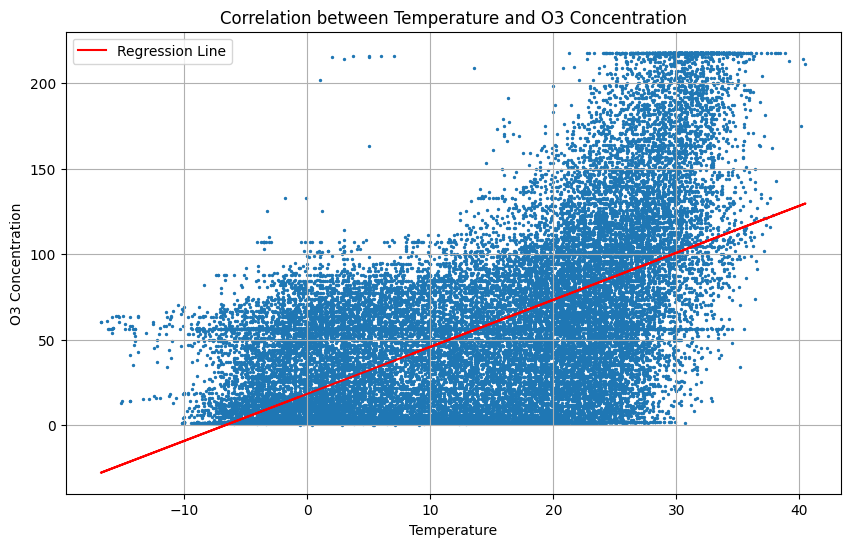

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['TEMP'], dataset['O3'], s=2)
plt.xlabel('Temperature')
plt.ylabel('O3 Concentration')
plt.title('Correlation between Temperature and O3 Concentration')
plt.grid(True)

slope, intercept, r_value, p_value, std_err = stats.linregress(dataset['TEMP'], dataset['O3'])
plt.plot(dataset['TEMP'], slope * dataset['TEMP'] + intercept, color='red', label='Regression Line')

plt.legend()
plt.show()


**Insight:**
- Scatter plot menunjukkan adanya korelasi positif

### Kesimpulan

- Dapat diketahui bahwa rata-rata temperatur tertinggi berada di tahun 2013 dan terendah berada di tahun 2015
- Kadar polusi memiliki pola naik dan turun setiap tahunnya
- Terdapat korelasi positif antara O3 dan TEMP